# Create the grid for WHETGEO-1D Richards
## Vanderborght analytical solution for clay-sand soil
    -Author: Niccolò Tubini and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----
This notebook is used to create the computational grid
    - domain discretization
    - setting parameters
    - setting initial condition
for the analytical solution presented by [Vanderborght et al. (2005)](https://acsess.onlinelibrary.wiley.com/doi/full/10.2136/vzj2005.0206).

    
All grid data are stored in a NetCDF file.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd

from WHETGEO1D_GridCreator import*
from WHETGEO1D_toNetCDF import*

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


## Define input:
**grid_input_file_name**: name of the grid input file (.csv) with the local file path 
   
> `/data/Grid_input/name.csv`

**ic_input_file_name**: name of the initial condition input file (.csv) with the local file path 
> `/data/Grid_input/name.csv`

**parameter_input_file_name**: name of the parameter input file (.csv) with the local file path 
>`/data/Grid_input/name.csv`

**dictionary_input_file_name**: name of the file (.csv) containing the dictionary for parameters name 
>`/data/Grid_input/name.csv`

**grid_type**: string defining how to discretize the 1D domain. You can choose among:
> `classical`

> `exponential`

> `mixed` 


**dz_min**: thickness of the first layer (for `exponential` and `mixed`)

**dz_max**: larger thickness of the grid (for `mixed`)

**b**: growth rate (for `exponential` and `mixed`)

**psi_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for water suction 
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

**T_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for temperature
>https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 


<br />
<br />

**output_file_name**: name of the output file (.nc) with the local file path
>`/data/Grid_NetCDF/name.nc`

**output_title**: string containing a title for the output, it is saved within the file

**output_summary**: string containing a description for the output, it is saved within the file (global metadata)

**output_date**: string containing the date of file creation, optionally

**output_institution**: string containing the name of whom created the file, optionally



In [2]:
grid_input_file_name = project_path + "/data/Grid_input/Vanderborght_grid_clay_sand.csv"

ic_input_file_name = project_path + "/data/Grid_input/Vanderborght_ic.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Vanderborght_parameter.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = 0.005

dz_max = 0.1

b = 0.1

psi_interp_model = "linear"

T_interp_model = "linear"



output_file_name = project_path + "/data/Grid_NetCDF/Vanderborght_clay_sand.nc"

output_title = '''Vanderborght et al. (2005) clay sand with 200 elements, dx=0.01'''
output_summary = '''


'''

output_date = ''

output_institution = 'Niccolò Tubini, Riccardo Rigon, GEOframe group'


## Run

In [3]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid1D(data_grid, dz_min, b, dz_max, grid_type)

[psi_0, T_0] = set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model)

control_volume_index = calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta      K  equationStateID  parameterID
0    L  0.0   50.0              0.0          3.0
1    L -0.5  150.0              0.0          1.0
2    L -2.0    NaN              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0 -20.0  273.15
1 -2.0 -20.0  273.15

Parameter
   thetaS  thetaR    n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0    0.43   0.045  3.0     15                   0.0                  0.0   
1    0.43   0.080  1.6      4                   0.0                  0.0   
2    0.40   0.100  1.1      1                   0.0                  0.0   

         Ks  
0  0.000116  
1  0.000006  
2  0.000001  



***SUCCESS writing!  C:\Users\Niccolo\OMS\OMS_Project_WHETGEO1D/data/Grid_NetCDF/Vanderborght_clay_sand.nc


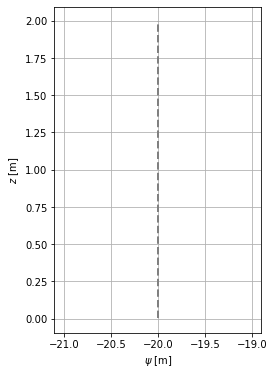

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6/1.618, 6)) 

ax.plot(psi_0, z, color='0.5', linewidth=2, linestyle='--', label='ic')

ax.set_xlabel('$\psi$ [m]')
ax.set_ylabel('$z$ [m]')

ax.grid()

plt.show()

In [5]:
parameter_ID

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])